In [1]:
from aicsimageio import AICSImage
from skimage.filters import threshold_multiotsu
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
import numpy as np
import operator
import skimage
from matplotlib.colors import LinearSegmentedColormap
import scipy
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from keras.utils import to_categorical
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from tensorflow.keras.layers import Dropout
import sklearn
import copy
import keras
from sklearn.inspection import permutation_importance
import plotly.express as px
from sklearn.linear_model import LinearRegression
import cv2
import keras_tuner
import xgboost as xgb
import hyperopt
from hyperopt import hp
from hyperopt import STATUS_OK
from sklearn.model_selection import GridSearchCV
import dill
import joblib
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, mean_squared_error
from combat.pycombat import pycombat
import pandas as pd
from neuroCombat import neuroCombat
import skimage
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
import imblearn
from random import sample
import random
import zenodo_get
import zipfile
import PIL
from PIL import Image
import os
import staintools
import multiprocess
from multiprocess import Pool
import pickle
import math
import tifffile

2025-09-28 22:18:38.602585: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759094318.624443  206665 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759094318.631140  206665 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759094318.648489  206665 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759094318.648516  206665 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759094318.648520  206665 computation_placer.cc:177] computation placer alr

In [15]:
del pool

In [3]:
dill.load_session("/scratch/c.c23115040/Epithelial_Segmentation.pkl")

In [ ]:
dill.load_session("/scratch/c.c23115040/Epithelial_Segmentation1.pkl")

In [2]:
dill.load_session("/scratch/c.c23115040/Epithelial_Segmentation2.pkl")

2025-09-28 22:20:08.313103: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [2]:
PIL.Image.MAX_IMAGE_PIXELS = 10000000000

In [ ]:
zenodo_get.download(record_or_doi="10.5281/zenodo.1485967", output_dir = '/scratch/c.c23115040/Zenodo', file_glob = '*peso_training_wsi_1.zip')

In [26]:
file = zipfile.ZipFile('/scratch/c.c23115040/Zenodo/peso_training_wsi_1.zip, 'r')
file.extractall("/scratch/c.c23115040/Zenodo/")
file = zipfile.ZipFile('/scratch/c.c23115040/Zenodo/peso_training_wsi_2.zip', 'r')
file.extractall("/scratch/c.c23115040/Zenodo/")
file = zipfile.ZipFile('/scratch/c.c23115040/Zenodo/peso_training_wsi_3.zip', 'r')
file.extractall("/scratch/c.c23115040/Zenodo/")
file = zipfile.ZipFile('/scratch/c.c23115040/Zenodo/peso_training_wsi_4.zip', 'r')
file.extractall("/scratch/c.c23115040/Zenodo/")
file = zipfile.ZipFile('/scratch/c.c23115040/Zenodo/peso_training_wsi_5.zip', 'r')
file.extractall("/scratch/c.c23115040/Zenodo/")
file = zipfile.ZipFile('/scratch/c.c23115040/Zenodo/peso_training_wsi_6.zip', 'r')
file.extractall("/scratch/c.c23115040/Zenodo/")
file = zipfile.ZipFile('/scratch/c.c23115040/Zenodo/peso_training_masks.zip', 'r')
file.extractall("/scratch/c.c23115040/Zenodo/")

In [3]:
lst = sorted(os.listdir('/scratch/c.c23115040/Zenodo/'))

In [4]:
lst = [i for i in lst if 'HE.tif' in i]

In [5]:
shuffl = list(range(len(lst)))

In [6]:
np.random.shuffle(shuffl)

In [7]:
len(shuffl)

62

In [8]:
train_ind = shuffl[0:25]

In [9]:
test_ind = shuffl[25:30]

In [ ]:
cut = 256
cut_sz = int(cut/2)
l = 250

h_and_e_train = []
masks_train = []
h_and_e_test = []
masks_test = []

for i in train_ind:
    path = "/scratch/c.c23115040/Zenodo/" + lst[i][:-4] + "_training_mask.tif"
    image_mask = Image.open(path)
    image_mask = image_mask.resize((image_mask.size[0]//2, image_mask.size[1]//2))
    image_mask = np.asarray(image_mask)
    path2 = "/scratch/c.c23115040/Zenodo/" + lst[i][:-4] + ".tif"
    image_loaded = Image.open(path2)
    image_loaded = image_loaded.resize((image_loaded.size[0]//2, image_loaded.size[1]//2))
    image_loaded = np.asarray(image_loaded)
    epithelium = np.argwhere(image_mask == 2)
    for w in range(l):
        x = image_mask.shape[0]
        y = image_mask.shape[1]
        while x+cut_sz>image_mask.shape[0]-1 or x-cut_sz<0 or y+cut_sz>image_mask.shape[1]-1 or y-cut_sz<0:
            ind = random.randrange(epithelium.shape[0])
            x = epithelium[ind, 0]
            y = epithelium[ind, 1]
        masks_train.append(image_mask[x-cut_sz:x+cut_sz, y-cut_sz:y+cut_sz])
        h_and_e_train.append(image_loaded[x-cut_sz:x+cut_sz, y-cut_sz:y+cut_sz,:])
    print(w)
    
for i in test_ind:
    path = "/scratch/c.c23115040/Zenodo/" + lst[i][:-4] + "_training_mask.tif"
    image_mask = Image.open(path)
    image_mask = image_mask.resize((image_mask.size[0]//2, image_mask.size[1]//2))
    image_mask = np.asarray(image_mask)
    path2 = "/scratch/c.c23115040/Zenodo/" + lst[i][:-4] + ".tif"
    image_loaded = Image.open(path2)
    image_loaded = image_loaded.resize((image_loaded.size[0]//2, image_loaded.size[1]//2))
    image_loaded = np.asarray(image_loaded)
    epithelium = np.argwhere(image_mask == 2)
    for w in range(l):
        x = image_mask.shape[0]
        y = image_mask.shape[1]
        while x+cut_sz>image_mask.shape[0]-1 or x-cut_sz<0 or y+cut_sz>image_mask.shape[1]-1 or y-cut_sz<0:
            ind = random.randrange(epithelium.shape[0])
            x = epithelium[ind, 0]
            y = epithelium[ind, 1]
        masks_test.append(image_mask[x-cut_sz:x+cut_sz, y-cut_sz:y+cut_sz])
        h_and_e_test.append(image_loaded[x-cut_sz:x+cut_sz, y-cut_sz:y+cut_sz,:])
    print(w)

In [3]:
inputs = tf.keras.layers.Input(shape = (256, 256, 3))

#Contraction path
c1 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
b1 = tf.keras.layers.BatchNormalization()(c1)
r1 = tf.keras.layers.ReLU()(b1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(r1)

c2 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
b2 = tf.keras.layers.BatchNormalization()(c2)
r2 = tf.keras.layers.ReLU()(b2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(r2)
 
c3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)  #3 to 32 rem
b3 = tf.keras.layers.BatchNormalization()(c3)
r3 = tf.keras.layers.ReLU()(b3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(r3)
 
c4 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
b4 = tf.keras.layers.BatchNormalization()(c4)
r4 = tf.keras.layers.ReLU()(b4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(r4)

#Expansive path 
 
u5 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c4)
u5 = tf.keras.layers.concatenate([u5, c3])
u5 = tf.keras.layers.BatchNormalization()(u5)
u5 = tf.keras.layers.ReLU()(u5)

u6 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(u5)
u6 = tf.keras.layers.concatenate([u6, c2])
u6 = tf.keras.layers.BatchNormalization()(u6)
u6 = tf.keras.layers.ReLU()(u6)
 
u7 = tf.keras.layers.Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same')(u6)
u7 = tf.keras.layers.concatenate([u7, c1], axis=3)
u7 = tf.keras.layers.BatchNormalization()(u7)
u7 = tf.keras.layers.ReLU()(u7)

 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(u7)

In [4]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='Dice', metrics=['accuracy'])

In [5]:
h_and_e_train = np.asarray(h_and_e_train).astype(np.uint8)
masks_train = np.asarray(masks_train)
h_and_e_test = np.asarray(h_and_e_test).astype(np.uint8)
masks_test = np.asarray(masks_test)

In [6]:
with open('/scratch/c.c23115040/h_train.pkl', 'wb') as fp:
    pickle.dump(h_and_e_train, fp)

In [9]:
with open('/scratch/c.c23115040/h_test.pkl', 'wb') as fp:
    pickle.dump(h_and_e_test, fp)

In [8]:
multiprocess.set_start_method('spawn', force=True)

In [9]:
def h_and_e_tr(i):
    import numpy as np
    np.bool = bool
    import staintools
    import pickle
    with open('/scratch/c.c23115040/h_train.pkl', 'rb') as fp:
        h_and_e_train = pickle.load(fp)
    normalizer = staintools.StainNormalizer(method='vahadane')
    normalizer.fit(staintools.LuminosityStandardizer.standardize(h_and_e_train[2234]))
    return normalizer.transform(staintools.LuminosityStandardizer.standardize(h_and_e_train[i]))

In [11]:
if __name__ == "__main__":
    pool = Pool(20) 
    h_and_e_train_n = pool.map(h_and_e_tr, list(range(len(h_and_e_train))))
    pool.close() 
    pool.join()

In [13]:
def h_and_e_te(i):
    import numpy as np
    np.bool = bool
    import staintools
    import pickle
    with open('/scratch/c.c23115040/h_train.pkl', 'rb') as fp:
        h_and_e_train = pickle.load(fp)
    with open('/scratch/c.c23115040/h_test.pkl', 'rb') as fp:
        h_and_e_test = pickle.load(fp)
    normalizer = staintools.StainNormalizer(method='vahadane')
    normalizer.fit(staintools.LuminosityStandardizer.standardize(h_and_e_train[2234]))
    return normalizer.transform(staintools.LuminosityStandardizer.standardize(h_and_e_test[i]))

In [14]:
if __name__ == "__main__":
    pool = Pool(10) 
    h_and_e_test_n = pool.map(h_and_e_te, list(range(len(h_and_e_test))))
    pool.close() 
    pool.join()

In [17]:
h_and_e_train_n = np.asarray(h_and_e_train_n).astype(np.uint8)
h_and_e_test_n = np.asarray(h_and_e_test_n).astype(np.uint8)

In [3]:
h_and_e_train_n.shape

(6250, 256, 256, 3)

In [4]:
masks_train.shape

(6250, 256, 256)

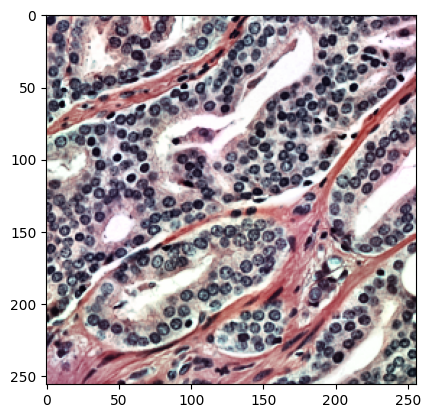

In [7]:
plt.imshow(h_and_e_train_n[2234])

In [8]:
with open("/scratch/c.c23115040/h_and_e_normalization_tile", "wb") as dill_file: 
    dill.dump(h_and_e_train_n[2234], dill_file)

In [19]:
for i in range(h_and_e_train_n.shape[0]):
    h_and_e_train_n[i,:,:,0] = (255*skimage.exposure.equalize_adapthist(h_and_e_train_n[i,:,:,0])).astype(np.uint8)
    h_and_e_train_n[i,:,:,1] = (255*skimage.exposure.equalize_adapthist(h_and_e_train_n[i,:,:,1])).astype(np.uint8)
    h_and_e_train_n[i,:,:,2] = (255*skimage.exposure.equalize_adapthist(h_and_e_train_n[i,:,:,2])).astype(np.uint8)
    
for i in range(h_and_e_test_n.shape[0]):
    h_and_e_test_n[i,:,:,0] = (255*skimage.exposure.equalize_adapthist(h_and_e_test_n[i,:,:,0])).astype(np.uint8)
    h_and_e_test_n[i,:,:,1] = (255*skimage.exposure.equalize_adapthist(h_and_e_test_n[i,:,:,1])).astype(np.uint8)
    h_and_e_test_n[i,:,:,2] = (255*skimage.exposure.equalize_adapthist(h_and_e_test_n[i,:,:,2])).astype(np.uint8)

In [7]:
h_and_e_train_n = np.asarray(h_and_e_train_n).astype(np.uint8)
h_and_e_test_n = np.asarray(h_and_e_test_n).astype(np.uint8)

In [5]:
select = list(range(h_and_e_train_n.shape[0]))
np.random.shuffle(select)
h_and_e_train_n = h_and_e_train_n[select,:,:,:]
masks_train = masks_train[select,:,:]

select = list(range(h_and_e_test_n.shape[0]))
np.random.shuffle(select)
h_and_e_test_n = h_and_e_test_n[select,:,:,:]
masks_test = masks_test[select,:,:]

In [6]:
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath="/home/c.c23115040/checkpoint.model.keras", monitor='val_loss', mode='min', save_best_only=True)
history = model.fit(h_and_e_train_n/255., masks_train == 2, validation_data=(h_and_e_test_n/255., masks_test == 2), epochs=30, callbacks=[model_checkpoint_callback])
model = keras.models.load_model("/home/c.c23115040/checkpoint.model.keras")

Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.6910 - loss: 0.4259 - val_accuracy: 0.7541 - val_loss: 0.6239
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.8550 - loss: 0.2195 - val_accuracy: 0.8495 - val_loss: 0.3188
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.8785 - loss: 0.1758 - val_accuracy: 0.8912 - val_loss: 0.2040
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.8833 - loss: 0.1627 - val_accuracy: 0.8941 - val_loss: 0.1849
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.8884 - loss: 0.1565 - val_accuracy: 0.9003 - val_loss: 0.1732
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.8906 - loss: 0.1512 - val_accuracy: 0.9030 - val_loss: 0.1707
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.8941 - loss: 0.1461 - val_accuracy: 0.8985 - val_loss: 0.1732
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.8969 - loss: 0.1413 - val_accu

In [7]:
pred = model.predict(h_and_e_test_n/255.)

40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step


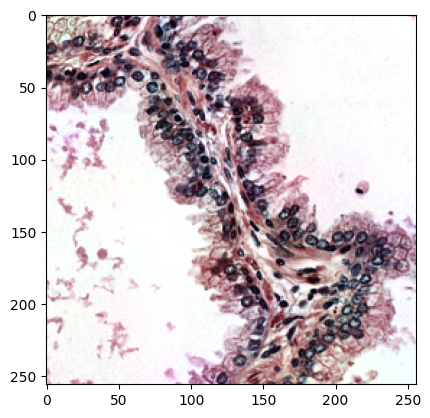

In [8]:
plt.imshow(h_and_e_test_n[1204])

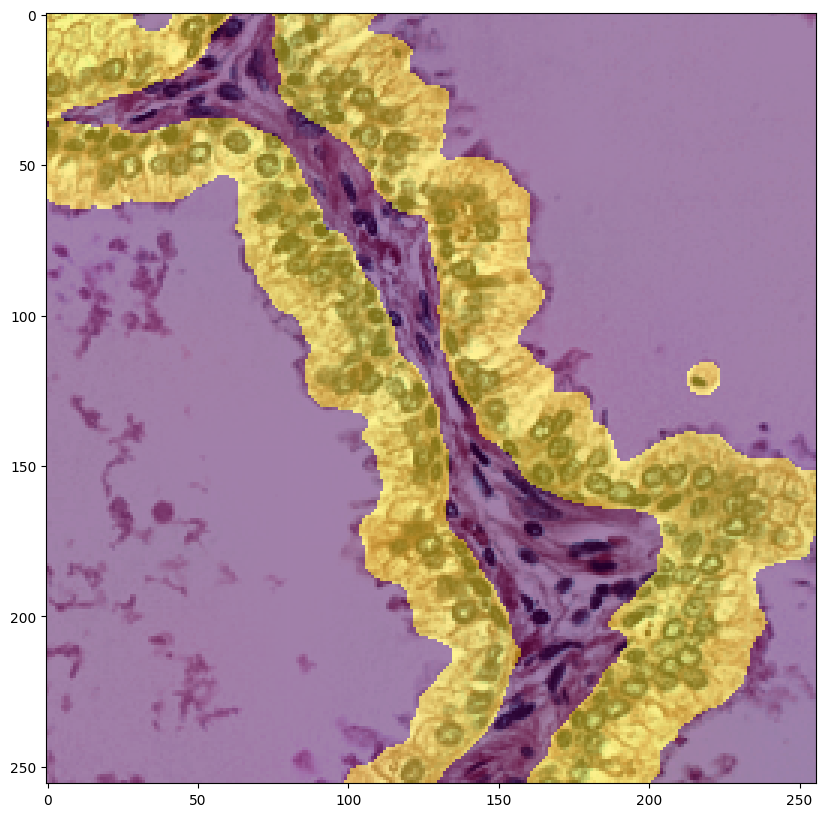

In [9]:
plt.figure(figsize = (10,10))
plt.imshow(h_and_e_test_n[1204])
plt.imshow(masks_test[1204] == 2, alpha = 0.5)

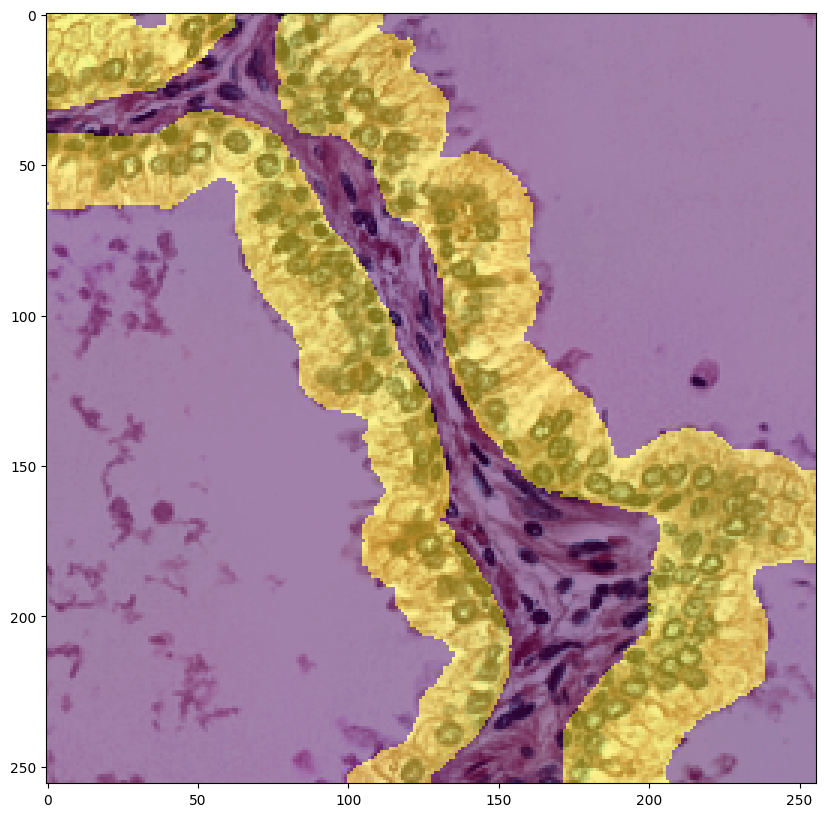

In [10]:
plt.figure(figsize = (10,10))
plt.imshow(h_and_e_test_n[1204])
plt.imshow(pred[1204] > 0.5, alpha = 0.5)

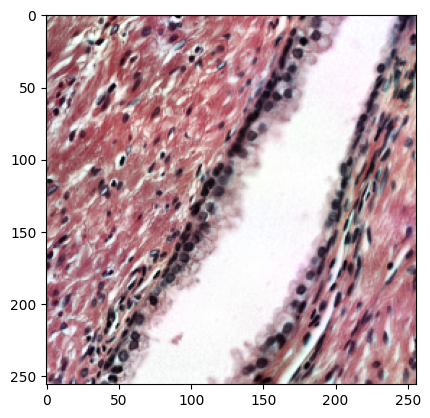

In [11]:
plt.imshow(h_and_e_test_n[645])

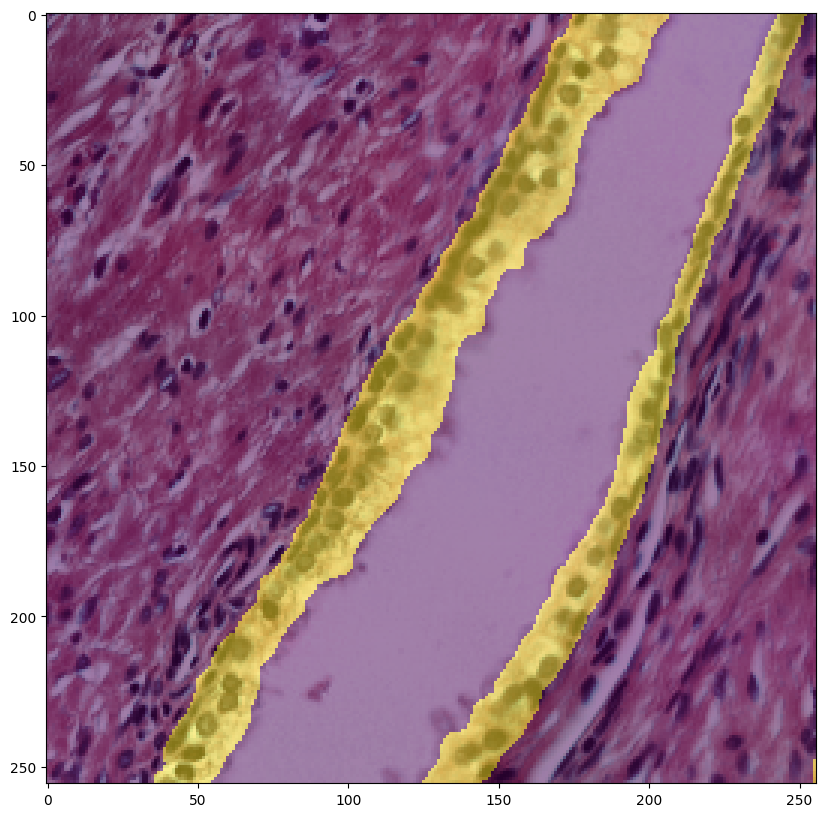

In [12]:
plt.figure(figsize = (10,10))
plt.imshow(h_and_e_test_n[645])
plt.imshow(masks_test[645] == 2, alpha = 0.5)

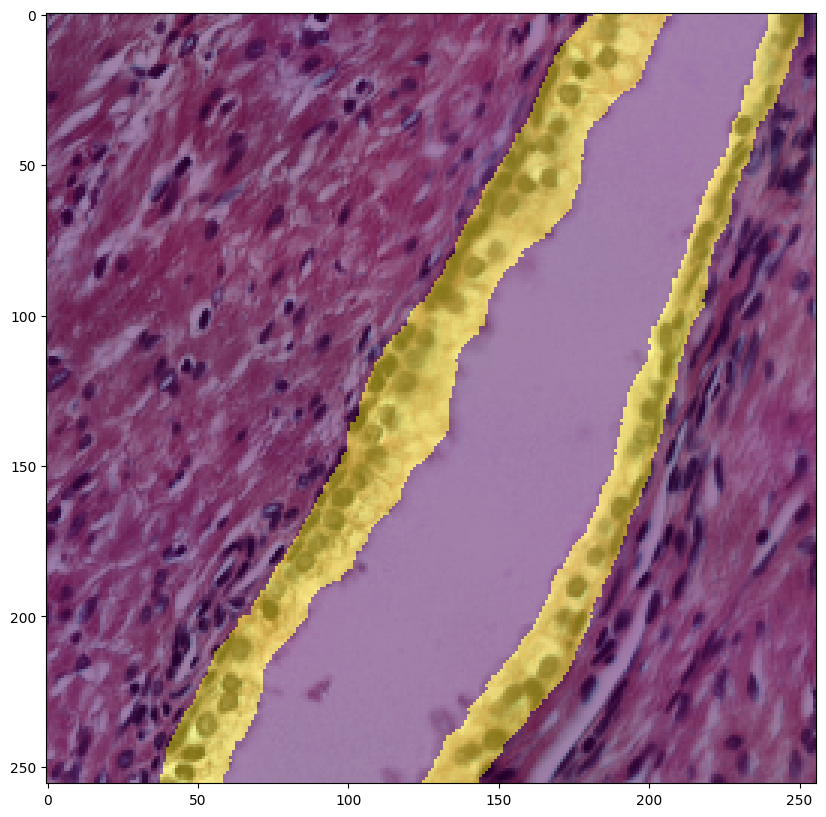

In [13]:
plt.figure(figsize = (10,10))
plt.imshow(h_and_e_test_n[645])
plt.imshow(pred[645] > 0.5, alpha = 0.5)

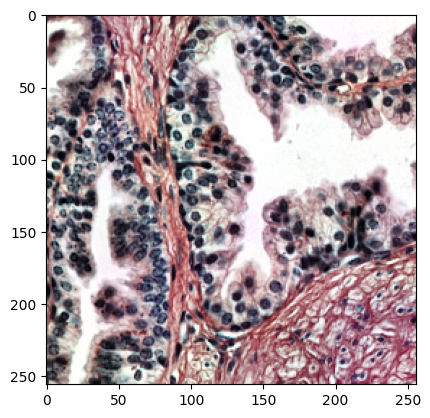

In [14]:
plt.imshow(h_and_e_test_n[222])

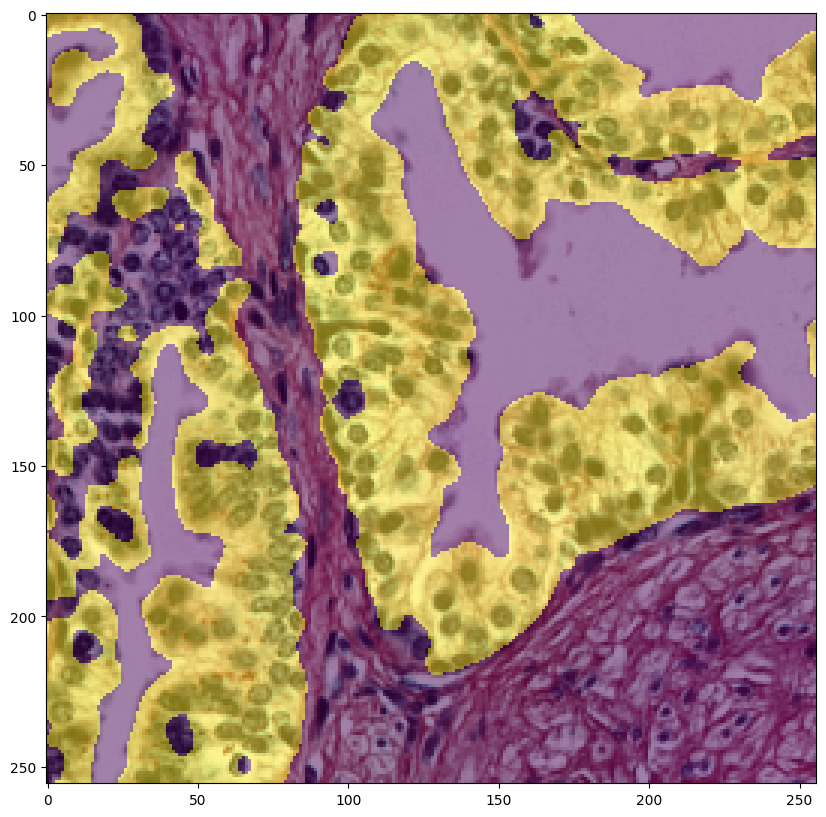

In [15]:
plt.figure(figsize = (10,10))
plt.imshow(h_and_e_test_n[222])
plt.imshow(masks_test[222] == 2, alpha = 0.5)

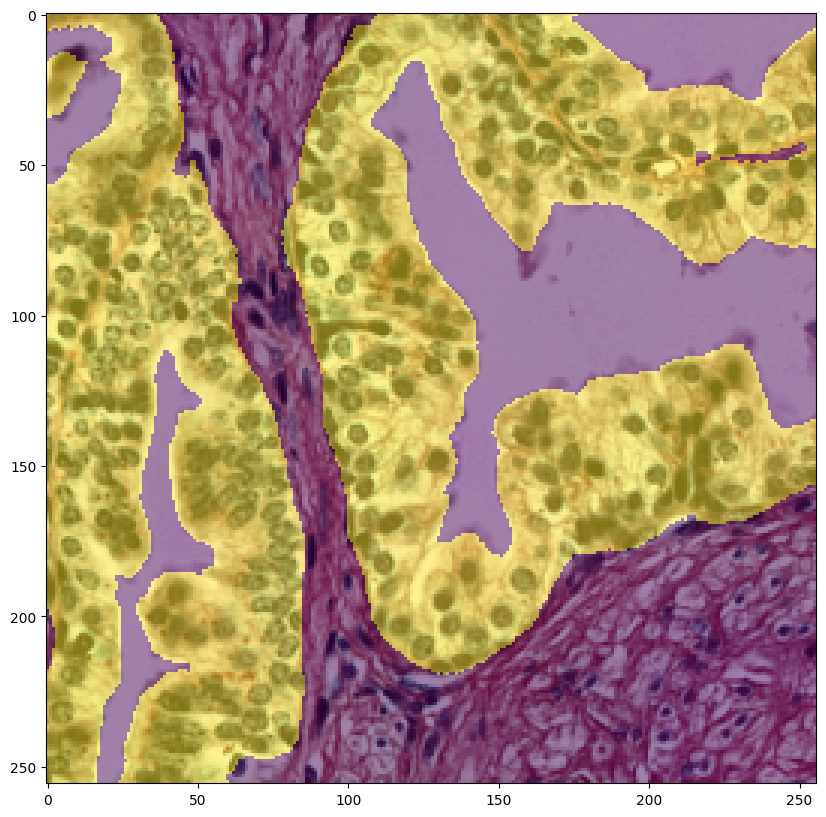

In [16]:
plt.figure(figsize = (10,10))
plt.imshow(h_and_e_test_n[222])
plt.imshow(pred[222] > 0.5, alpha = 0.5)

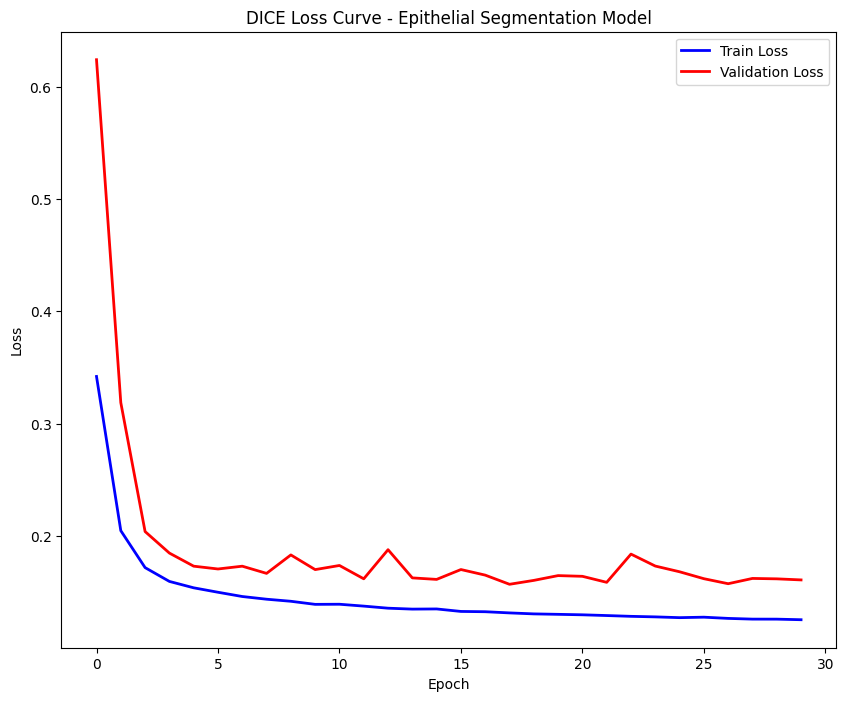

In [19]:
plt.figure(figsize=(10,8))
plt.plot(range(30), history.history['loss'], color='blue', lw=2, label = 'Train Loss')
plt.plot(range(30), history.history['val_loss'], color='red', lw=2,  label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('DICE Loss Curve - Epithelial Segmentation Model')
plt.legend(loc="upper right")

In [3]:
sklearn.metrics.jaccard_score((masks_test == 2).ravel(), (pred > 0.5).ravel())

0.7296569824698765

In [4]:
1 - scipy.spatial.distance.dice((masks_test == 2).ravel(), (pred > 0.5).ravel())

0.8437013695373952

In [5]:
with open("/scratch/c.c23115040/h_and_e_normalization_tile", "rb") as dill_file:
    h_and_e_normalization_tile = dill.load(dill_file)

In [6]:
np.bool = bool

In [7]:
normalizer = staintools.StainNormalizer(method='vahadane')
normalizer.fit(staintools.LuminosityStandardizer.standardize(h_and_e_normalization_tile))

In [8]:
lst = open("/scratch/c.c23115040/TMA Data/TMA Data/list.txt", "r")
lst = lst.read()
lst = lst.split("\n")
list2 = []
for i in range(len(lst)):
    if lst[i][12:15] == '0.6':
        list2.append(lst[i])
lst = list2       

In [ ]:
epithelials = []

for k in range(len(lst)):
    img = cv2.imread("/scratch/c.c23115040/TMA Data/TMA Data/" + lst[k] + "_DRAQ5.tiff", cv2.IMREAD_UNCHANGED)
    DRAQ5 = img
    DRAQ5_mean = np.mean(DRAQ5)
    DRAQ5_gamma = math.log(DRAQ5_mean)/math.log(2048)
    DRAQ5_comp = (DRAQ5- np.min(DRAQ5))/(np.max(DRAQ5) - np.min(DRAQ5))
    DRAQ5_comp = np.power(DRAQ5_comp, DRAQ5_gamma)
    img = cv2.imread("/scratch/c.c23115040/TMA Data/TMA Data/" + lst[k] + "_Eosin.tiff", cv2.IMREAD_UNCHANGED)
    Eosin = img
    Eosin_mean = np.mean(Eosin)
    Eosin_gamma = math.log(Eosin_mean)/math.log(2048)
    Eosin_comp = (Eosin- np.min(Eosin))/(np.max(Eosin) - np.min(Eosin))
    Eosin_comp = np.power(Eosin_comp, Eosin_gamma)
    DRAQ5_comp_mean = np.mean(DRAQ5_comp)
    Eosin_comp_mean = np.mean(Eosin_comp)
    average = (DRAQ5_comp_mean + Eosin_comp_mean)/2
    DRAQ5_scale = average/DRAQ5_comp_mean
    Eosin_scale = average/Eosin_comp_mean
    DRAQ5_comp = DRAQ5_scale*DRAQ5_comp
    Eosin_comp = Eosin_scale*Eosin_comp
    row, column = DRAQ5.shape
    R = np.ones((row, column)) - (1-0.24)*DRAQ5_comp - (1-0.88)*Eosin_comp
    R[R<0] = 0
    R[R>1] = 1
    R = (255*((R- np.min(R))/(np.max(R) - np.min(R)))).astype(np.uint8)
    G = np.ones((row, column)) - (1-0.21)*DRAQ5_comp - (1-0.27)*Eosin_comp
    G[G<0] = 0
    G[G>1] = 1
    G = (255*((G- np.min(G))/(np.max(G) - np.min(G)))).astype(np.uint8)
    B = np.ones((row, column)) - (1-0.62)*DRAQ5_comp - (1-0.66)*Eosin_comp
    B[B<0] = 0
    B[B>1] = 1
    B = (255*((B- np.min(B))/(np.max(B) - np.min(B)))).astype(np.uint8)
    RGB_t = np.stack((R,G,B), axis = 2)
    R = (255*skimage.exposure.equalize_adapthist(R)).astype(np.uint8)
    G = (255*skimage.exposure.equalize_adapthist(G)).astype(np.uint8)
    B = (255*skimage.exposure.equalize_adapthist(B)).astype(np.uint8)
    RGB = np.stack((R,G,B), axis = 2)
    
    sz = 356
    cr1 = int(np.floor(RGB.shape[0]/sz))
    cr2 = int(np.floor(RGB.shape[1]/sz))
    
    gray = cv2.cvtColor(RGB_t, cv2.COLOR_RGB2GRAY)
    thr = threshold_multiotsu(image=gray, classes=3, nbins=255)
    tissue = gray < thr[1]

    hold = []
    epithelium = np.zeros((RGB.shape[0], RGB.shape[1]))
    
    for i in range(cr1):
        for j in range(cr2):
            try:
                norm = normalizer.transform(staintools.LuminosityStandardizer.standardize(cv2.resize(RGB[sz*i:(sz*i+sz), sz*j:(sz*j+sz), :], (256,256), fx=0, fy=0, interpolation = cv2.INTER_NEAREST)))
                #norm[i,:,:,0] = (255*skimage.exposure.equalize_adapthist(norm[i,:,:,0])).astype(np.uint8)
                #norm[i,:,:,1] = (255*skimage.exposure.equalize_adapthist(norm[i,:,:,1])).astype(np.uint8)
                #norm[i,:,:,2] = (255*skimage.exposure.equalize_adapthist(norm[i,:,:,2])).astype(np.uint8)
                hold.append(norm)
            except:
                hold.append(cv2.resize(RGB[sz*i:(sz*i+sz), sz*j:(sz*j+sz), :], (256,256), fx=0, fy=0, interpolation = cv2.INTER_NEAREST))
                
    hold = np.asarray(hold).astype(np.uint8)
    pred2 = model.predict(hold/255.)
    
    f = 0
    for i in range(cr1):
        for j in range(cr2):
            epithelium[sz*i:(sz*i+sz), sz*j:(sz*j+sz)] = cv2.resize(pred2[f,:,:,:], (sz,sz), fx=0, fy=0, interpolation = cv2.INTER_NEAREST) > 0.5
            f += 1
    epithelium[tissue == 0] = 0
    epithelials.append(epithelium.astype(bool))

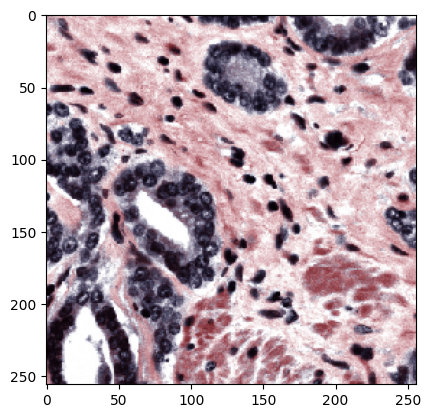

In [10]:
plt.imshow(hold[50])

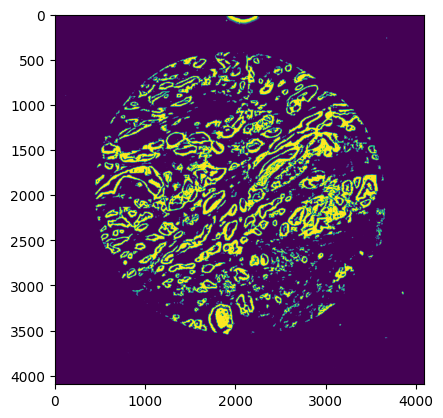

In [22]:
plt.imshow(epithelials[43])

In [17]:
np.save("/home/c.c23115040/epithelials.npy", np.array(epithelials, dtype=object), allow_pickle=True)

In [6]:
lst = open("/scratch/c.c23115040/AMW/list.txt", "r")
lst = lst.read()
lst = lst.split("\n")

In [ ]:
epithelials = []

for k in range(len(lst)):
    img = cv2.imread("/scratch/c.c23115040/AMW/" + lst[k] + "DRAQ5.tiff", cv2.IMREAD_UNCHANGED)
    DRAQ5 = img
    DRAQ5_mean = np.mean(DRAQ5)
    DRAQ5_gamma = math.log(DRAQ5_mean)/math.log(2048)
    DRAQ5_comp = (DRAQ5- np.min(DRAQ5))/(np.max(DRAQ5) - np.min(DRAQ5))
    DRAQ5_comp = np.power(DRAQ5_comp, DRAQ5_gamma)
    img = cv2.imread("/scratch/c.c23115040/AMW/" + lst[k] + "Eosin.tiff", cv2.IMREAD_UNCHANGED)
    Eosin = img
    Eosin_mean = np.mean(Eosin)
    Eosin_gamma = math.log(Eosin_mean)/math.log(2048)
    Eosin_comp = (Eosin- np.min(Eosin))/(np.max(Eosin) - np.min(Eosin))
    Eosin_comp = np.power(Eosin_comp, Eosin_gamma)
    DRAQ5_comp_mean = np.mean(DRAQ5_comp)
    Eosin_comp_mean = np.mean(Eosin_comp)
    average = (DRAQ5_comp_mean + Eosin_comp_mean)/2
    DRAQ5_scale = average/DRAQ5_comp_mean
    Eosin_scale = average/Eosin_comp_mean
    DRAQ5_comp = DRAQ5_scale*DRAQ5_comp
    Eosin_comp = Eosin_scale*Eosin_comp
    row, column = DRAQ5.shape
    R = np.ones((row, column)) - (1-0.24)*DRAQ5_comp - (1-0.88)*Eosin_comp
    R[R<0] = 0
    R[R>1] = 1
    R = (255*((R- np.min(R))/(np.max(R) - np.min(R)))).astype(np.uint8)
    G = np.ones((row, column)) - (1-0.21)*DRAQ5_comp - (1-0.27)*Eosin_comp
    G[G<0] = 0
    G[G>1] = 1
    G = (255*((G- np.min(G))/(np.max(G) - np.min(G)))).astype(np.uint8)
    B = np.ones((row, column)) - (1-0.62)*DRAQ5_comp - (1-0.66)*Eosin_comp
    B[B<0] = 0
    B[B>1] = 1
    B = (255*((B- np.min(B))/(np.max(B) - np.min(B)))).astype(np.uint8)
    RGB_t = np.stack((R,G,B), axis = 2)
    R = (255*skimage.exposure.equalize_adapthist(R)).astype(np.uint8)
    G = (255*skimage.exposure.equalize_adapthist(G)).astype(np.uint8)
    B = (255*skimage.exposure.equalize_adapthist(B)).astype(np.uint8)
    RGB = np.stack((R,G,B), axis = 2)
    
    sz = 471
    cr1 = int(np.floor(RGB.shape[0]/sz))
    cr2 = int(np.floor(RGB.shape[1]/sz))
    
    gray = cv2.cvtColor(RGB_t, cv2.COLOR_RGB2GRAY)
    thr = threshold_multiotsu(image=gray, classes=3, nbins=255)
    tissue = gray < thr[1]

    hold = []
    epithelium = np.zeros((RGB.shape[0], RGB.shape[1]))
    
    for i in range(cr1):
        for j in range(cr2):
            try:
                norm = normalizer.transform(staintools.LuminosityStandardizer.standardize(cv2.resize(RGB[sz*i:(sz*i+sz), sz*j:(sz*j+sz), :], (256,256), fx=0, fy=0, interpolation = cv2.INTER_NEAREST)))
                #norm[i,:,:,0] = (255*skimage.exposure.equalize_adapthist(norm[i,:,:,0])).astype(np.uint8)
                #norm[i,:,:,1] = (255*skimage.exposure.equalize_adapthist(norm[i,:,:,1])).astype(np.uint8)
                #norm[i,:,:,2] = (255*skimage.exposure.equalize_adapthist(norm[i,:,:,2])).astype(np.uint8)
                hold.append(norm)
            except:
                hold.append(cv2.resize(RGB[sz*i:(sz*i+sz), sz*j:(sz*j+sz), :], (256,256), fx=0, fy=0, interpolation = cv2.INTER_NEAREST))
                
    hold = np.asarray(hold).astype(np.uint8)
    pred2 = model.predict(hold/255.)
    
    f = 0
    for i in range(cr1):
        for j in range(cr2):
            epithelium[sz*i:(sz*i+sz), sz*j:(sz*j+sz)] = cv2.resize(pred2[f,:,:,:], (sz,sz), fx=0, fy=0, interpolation = cv2.INTER_NEAREST) > 0.5
            f += 1
    epithelium[tissue == 0] = 0
    epithelials.append(epithelium.astype(bool))

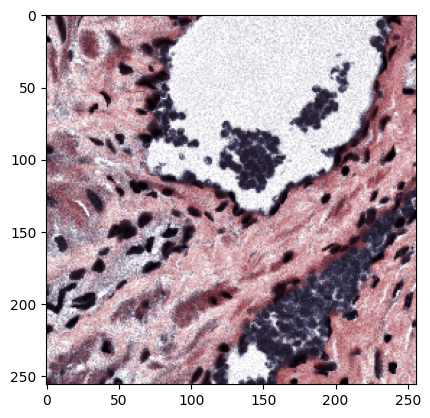

In [8]:
plt.imshow(hold[55])

In [9]:
np.save("/home/c.c23115040/epithelials2.npy", np.array(epithelials, dtype=object), allow_pickle=True)

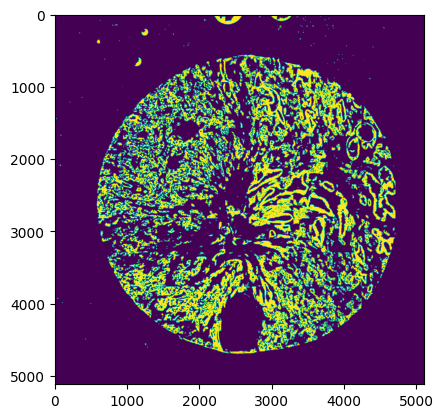

In [20]:
plt.imshow(epithelials[13])

In [9]:
lst = open("/scratch/c.c23115040/WCB_Sequential/list.txt", "r")
lst = lst.read()
lst = lst.split("\n")

In [ ]:
epithelials = []

for k in range(len(lst)):
    img = cv2.imread("/scratch/c.c23115040/WCB_Sequential/" + lst[k] + "DRAQ5.tiff", cv2.IMREAD_UNCHANGED)
    DRAQ5 = img
    DRAQ5_mean = np.mean(DRAQ5)
    DRAQ5_gamma = math.log(DRAQ5_mean)/math.log(2048)
    DRAQ5_comp = (DRAQ5- np.min(DRAQ5))/(np.max(DRAQ5) - np.min(DRAQ5))
    DRAQ5_comp = np.power(DRAQ5_comp, DRAQ5_gamma)
    img = cv2.imread("/scratch/c.c23115040/WCB_Sequential/" + lst[k] + "Eosin.tiff", cv2.IMREAD_UNCHANGED)
    Eosin = img
    Eosin_mean = np.mean(Eosin)
    Eosin_gamma = math.log(Eosin_mean)/math.log(2048)
    Eosin_comp = (Eosin- np.min(Eosin))/(np.max(Eosin) - np.min(Eosin))
    Eosin_comp = np.power(Eosin_comp, Eosin_gamma)
    DRAQ5_comp_mean = np.mean(DRAQ5_comp)
    Eosin_comp_mean = np.mean(Eosin_comp)
    average = (DRAQ5_comp_mean + Eosin_comp_mean)/2
    DRAQ5_scale = average/DRAQ5_comp_mean
    Eosin_scale = average/Eosin_comp_mean
    DRAQ5_comp = DRAQ5_scale*DRAQ5_comp
    Eosin_comp = Eosin_scale*Eosin_comp
    row, column = DRAQ5.shape
    R = np.ones((row, column)) - (1-0.24)*DRAQ5_comp - (1-0.88)*Eosin_comp
    R[R<0] = 0
    R[R>1] = 1
    R = (255*((R- np.min(R))/(np.max(R) - np.min(R)))).astype(np.uint8)
    G = np.ones((row, column)) - (1-0.21)*DRAQ5_comp - (1-0.27)*Eosin_comp
    G[G<0] = 0
    G[G>1] = 1
    G = (255*((G- np.min(G))/(np.max(G) - np.min(G)))).astype(np.uint8)
    B = np.ones((row, column)) - (1-0.62)*DRAQ5_comp - (1-0.66)*Eosin_comp
    B[B<0] = 0
    B[B>1] = 1
    B = (255*((B- np.min(B))/(np.max(B) - np.min(B)))).astype(np.uint8)
    RGB_t = np.stack((R,G,B), axis = 2)
    R = (255*skimage.exposure.equalize_adapthist(R)).astype(np.uint8)
    G = (255*skimage.exposure.equalize_adapthist(G)).astype(np.uint8)
    B = (255*skimage.exposure.equalize_adapthist(B)).astype(np.uint8)
    RGB = np.stack((R,G,B), axis = 2)
    
    sz = 471
    cr1 = int(np.floor(RGB.shape[0]/sz))
    cr2 = int(np.floor(RGB.shape[1]/sz))
    
    gray = cv2.cvtColor(RGB_t, cv2.COLOR_RGB2GRAY)
    thr = threshold_multiotsu(image=gray, classes=3, nbins=255)
    tissue = gray < thr[1]

    hold = []
    epithelium = np.zeros((RGB.shape[0], RGB.shape[1]))
    
    for i in range(cr1):
        for j in range(cr2):
            try:
                norm = normalizer.transform(staintools.LuminosityStandardizer.standardize(cv2.resize(RGB[sz*i:(sz*i+sz), sz*j:(sz*j+sz), :], (256,256), fx=0, fy=0, interpolation = cv2.INTER_NEAREST)))
                hold.append(norm)
            except:
                hold.append(cv2.resize(RGB[sz*i:(sz*i+sz), sz*j:(sz*j+sz), :], (256,256), fx=0, fy=0, interpolation = cv2.INTER_NEAREST))          
    hold = np.asarray(hold).astype(np.uint8)
    pred2 = model.predict(hold/255.)
    
    f = 0
    for i in range(cr1):
        for j in range(cr2):
            epithelium[sz*i:(sz*i+sz), sz*j:(sz*j+sz)] = cv2.resize(pred2[f,:,:,:], (sz,sz), fx=0, fy=0, interpolation = cv2.INTER_NEAREST) > 0.5
            f += 1
    epithelium[tissue == 0] = 0
    epithelials.append(epithelium.astype(bool))

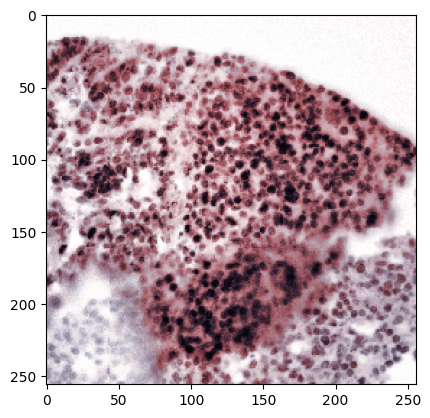

In [17]:
plt.imshow(hold[6])

In [18]:
np.save("/home/c.c23115040/epithelials3.npy", np.array(epithelials, dtype=object), allow_pickle=True)

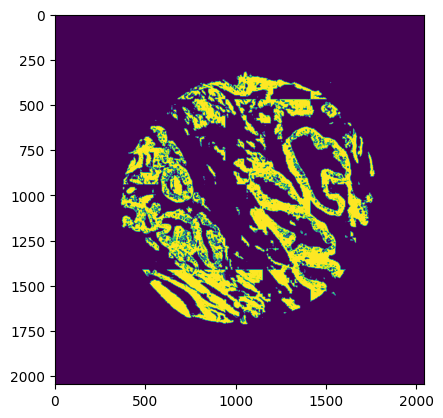

In [28]:
plt.imshow(epithelials[89])

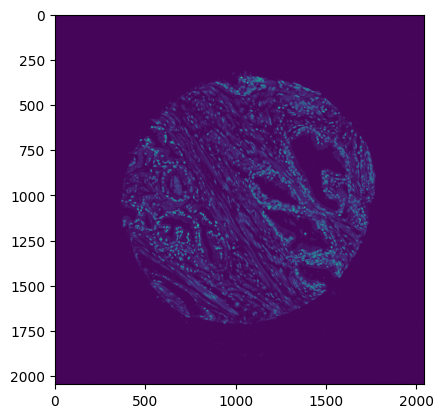

In [29]:
plt.imshow(cv2.imread("/scratch/c.c23115040/WCB_Sequential/" + lst[89] + "DRAQ5.tiff", cv2.IMREAD_UNCHANGED))

In [8]:
lst = open("/scratch/c.c23115040/MGP/D&E WCB CORE/list.txt", "r")
lst = lst.read()
lst = lst.split("\n")

lst2 = open("/scratch/c.c23115040/MGP/D&E WCB CORE/list2.txt", "r")
lst2 = lst2.read()
lst2 = lst2.split("\n")

In [ ]:
#epithelials = []

for k in range(9, 10):
    img = tifffile.imread("/scratch/c.c23115040/MGP/D&E WCB CORE/" + lst[k] + "/" + lst2[0] + "_DRAQ5.tiff")
    DRAQ5 = img
    DRAQ5 = np.moveaxis(DRAQ5, 0, 2)
    img = tifffile.imread("/scratch/c.c23115040/MGP/D&E WCB CORE/" + lst[k] + "/" + lst2[0] + "_Eosin.tiff")
    Eosin = img
    Eosin = np.moveaxis(Eosin, 0, 2)
    
    sz = 471
    cr1 = int(np.floor(DRAQ5.shape[0]/sz))
    cr2 = int(np.floor(DRAQ5.shape[1]/sz))
    
    DRAQ5_crop_unc = np.zeros((cr1, cr2, sz, sz, 5))
    Eosin_crop_unc = np.zeros((cr1, cr2, sz, sz, 5))
    for i in range(cr1):
        for j in range(cr2):
            DRAQ5_crop_unc[i, j, :, :, :] = DRAQ5[sz*i:(sz*i+sz), sz*j:(sz*j+sz), :]
            Eosin_crop_unc[i, j, :, :, :] = Eosin[sz*i:(sz*i+sz), sz*j:(sz*j+sz), :]
            
    focus = np.zeros((cr1, cr2, 5))

    for i in range(cr1):
        for j in range(cr2):
            clear = []
            for q in range(5):
                gy, gx = np.gradient(DRAQ5_crop_unc[i, j, :, :, q])
                gnorm = np.sqrt(gx**2 + gy**2)
                sh = np.average(gnorm)
                clear.append(sh)
            clear = np.argsort(-np.asarray(clear))
            focus[i, j, :] = clear
            
    RGB = []
    RGB_tr = []
    for q in range(5):
        DRAQ5_mean = np.mean(DRAQ5[:,:,q])
        DRAQ5_gamma = math.log(DRAQ5_mean)/math.log(2048)
        DRAQ5_comp = (DRAQ5[:,:,q]- np.min(DRAQ5[:,:,q]))/(np.max(DRAQ5[:,:,q]) - np.min(DRAQ5[:,:,q]))
        DRAQ5_comp = np.power(DRAQ5_comp, DRAQ5_gamma)
        Eosin_mean = np.mean(Eosin[:,:,q])
        Eosin_gamma = math.log(Eosin_mean)/math.log(2048)
        Eosin_comp = (Eosin[:,:,q]- np.min(Eosin[:,:,q]))/(np.max(Eosin[:,:,q]) - np.min(Eosin[:,:,q]))
        Eosin_comp = np.power(Eosin_comp, Eosin_gamma)
        DRAQ5_comp_mean = np.mean(DRAQ5_comp)
        Eosin_comp_mean = np.mean(Eosin_comp)
        average = (DRAQ5_comp_mean + Eosin_comp_mean)/2
        DRAQ5_scale = average/DRAQ5_comp_mean
        Eosin_scale = average/Eosin_comp_mean
        DRAQ5_comp = DRAQ5_scale*DRAQ5_comp
        Eosin_comp = Eosin_scale*Eosin_comp
        row, column = DRAQ5[:,:,q].shape
        R = np.ones((row, column)) - (1-0.24)*DRAQ5_comp - (1-0.88)*Eosin_comp
        R[R<0] = 0
        R[R>1] = 1
        R = (255*((R- np.min(R))/(np.max(R) - np.min(R)))).astype(np.uint8)
        G = np.ones((row, column)) - (1-0.21)*DRAQ5_comp - (1-0.27)*Eosin_comp
        G[G<0] = 0
        G[G>1] = 1
        G = (255*((G- np.min(G))/(np.max(G) - np.min(G)))).astype(np.uint8)
        B = np.ones((row, column)) - (1-0.62)*DRAQ5_comp - (1-0.66)*Eosin_comp
        B[B<0] = 0
        B[B>1] = 1
        B = (255*((B- np.min(B))/(np.max(B) - np.min(B)))).astype(np.uint8)
        RGB_t = np.stack((R,G,B), axis = 2)
        RGB_tr.append(RGB_t)
        R = (255*skimage.exposure.equalize_adapthist(R)).astype(np.uint8)
        G = (255*skimage.exposure.equalize_adapthist(G)).astype(np.uint8)
        B = (255*skimage.exposure.equalize_adapthist(B)).astype(np.uint8)
        RGB.append(np.stack((R,G,B), axis = 2))
          
    gray = cv2.cvtColor(RGB_tr[2], cv2.COLOR_RGB2GRAY)
    thr = threshold_multiotsu(image=gray, classes=3, nbins=255)
    tissue = gray < thr[1]
    
    RGB_crop = np.zeros((cr1, cr2, sz, sz, 3))
    for i in range(cr1):
        for j in range(cr2):
            RGB_crop[i, j, :, :, :] = RGB[focus[i, j, 0].astype(int)][sz*i:(sz*i+sz), sz*j:(sz*j+sz), :]
 
    hold = []
    epithelium = np.zeros((RGB[0].shape[0], RGB[0].shape[1]))
    
    for i in range(cr1):
        for j in range(cr2):
            try:
                norm = normalizer.transform(staintools.LuminosityStandardizer.standardize(cv2.resize(RGB[focus[i, j, 0].astype(int)][sz*i:(sz*i+sz), sz*j:(sz*j+sz), :], (256,256), fx=0, fy=0, interpolation = cv2.INTER_NEAREST)))
                hold.append(norm)
            except:
                hold.append(cv2.resize(RGB[focus[i, j, 0].astype(int)][sz*i:(sz*i+sz), sz*j:(sz*j+sz), :], (256,256), fx=0, fy=0, interpolation = cv2.INTER_NEAREST))           
    hold = np.asarray(hold).astype(np.uint8)
    pred2 = model.predict(hold/255.)
    
    f = 0
    for i in range(cr1):
        for j in range(cr2):
            epithelium[sz*i:(sz*i+sz), sz*j:(sz*j+sz)] = cv2.resize(pred2[f,:,:,:], (sz,sz), fx=0, fy=0, interpolation = cv2.INTER_NEAREST) > 0.5
            f += 1
    epithelium[tissue == 0] = 0
    epithelials.append(epithelium.astype(bool))

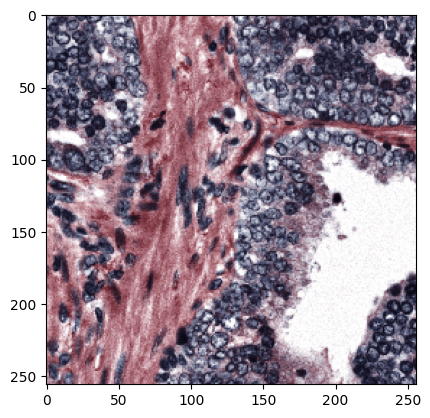

In [13]:
plt.imshow(hold[1309])

In [14]:
np.save("/home/c.c23115040/epithelials4.npy", np.array(epithelials, dtype=object), allow_pickle=True)

In [9]:
epithelials = np.load("/home/c.c23115040/epithelials4.npy", allow_pickle=True)

In [10]:
epithelials = list(epithelials)

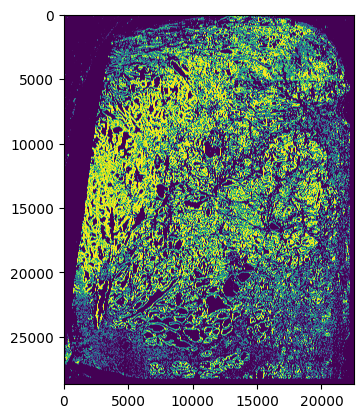

In [15]:
plt.imshow(epithelials[9])

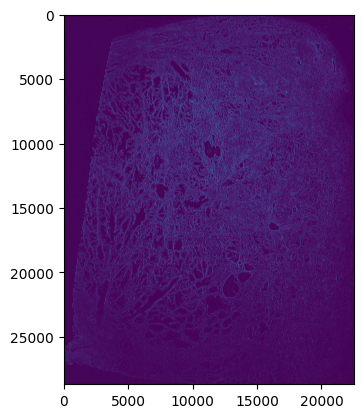

In [16]:
plt.imshow(tifffile.imread("/scratch/c.c23115040/MGP/D&E WCB CORE/" + lst[9] + "/" + lst2[0] + "_Eosin.tiff")[2])